
Task 4 — Portfolio Optimization using MPT
- TSLA expected return from forecast (Task 3)
- BND/SPY expected returns from historical averages (annualized)
- Covariance from historical daily returns (TSLA/BND/SPY)
- Efficient Frontier (Monte Carlo), Max Sharpe & Min Volatility
- Outputs plot + CSV + summary report

Required inputs:
- CSV with historical OHLCV for TSLA, BND, SPY (must contain 'Date' and 'Adj Close')
- CSV with TSLA forecast from Task 3 (columns: Forecast, Lower, Upper; index as dates)


In [1]:
#import  dependences
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# loaded function from the module

In [2]:
from src import portfolio_optimization
from src.portfolio_optimization import load_historical_prices,covariance_matrix_annual,compute_daily_returns,load_tsla_expected_return_from_forecast,expected_returns_annual,simulate_portfolios,pick_key_portfolios,plot_efficient_frontier,recommend_portfolio,write_summary

In [5]:
CONFIG = {
    # Paths to historical CSVs (from Task 1)
    "tsla_hist_csv": "F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/TSLA_data.csv",
    "bnd_hist_csv":  "F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/BND_data.csv",
    "spy_hist_csv":  "F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/SPY_data.csv",

    # Path to TSLA forecast results (from Task 3)
    "tsla_forecast_csv": "F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/data/output/tesla_forecast_6months.csv",  # columns: Forecast, Lower, Upper

    # Columns
    "date_col": "Date",
    "price_col": "Close",  # fallback to 'Close' if not present

    # Output
    "output_dir": "data/output",
    "frontier_png": "efficient_frontier.png",
    "frontier_csv": "efficient_frontier_samples.csv",
    "summary_json": "portfolio_summary.json",
    "summary_txt": "portfolio_summary.txt",

    # Simulation
    "n_portfolios": 50000,
    "risk_free_rate": 0.02,  # annualized
    "trading_days": 252
}


## loading of historical data

In [3]:
#cfg=CONFIG, preference="max_sharpe"
preference="max_sharpe"
 # Load historical prices
prices = load_historical_prices()


In [4]:
df=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/arima_forecast (1).csv')  # columns: Forecast, Lower, Upper
print(df.head(10))
# print(forecasted_tsla.isna().sum())



         Date    Forecast
0  02/01/2024  248.589829
1  03/01/2024  249.978745
2  04/01/2024  249.734335
3  05/01/2024  249.257801
4  08/01/2024  249.208264
5  09/01/2024  248.670971
6  10/01/2024  249.148629
7  11/01/2024  249.186808
8  12/01/2024  249.621606
9  16/01/2024  249.839300


# daily return

In [4]:
# -----------------------------
# 6) Main
# -----------------------------

    # Daily returns (for covariance)
daily_returns = compute_daily_returns(prices)
print(daily_returns)



                TSLA       BND       SPY
Date                                    
2015-07-02  0.040386  0.002472 -0.000916
2015-07-06 -0.001071  0.003452 -0.002846
2015-07-07 -0.042328  0.000984  0.006288
2015-07-08 -0.048231  0.002824 -0.016777
2015-07-09  0.011610 -0.003306  0.001809
...              ...       ...       ...
2025-07-24 -0.081970 -0.001232  0.000331
2025-07-25  0.035244  0.002468  0.004224
2025-07-28  0.030152 -0.001641 -0.000251
2025-07-29 -0.013483  0.005205 -0.002638
2025-07-30 -0.006725 -0.002589 -0.001259

[2534 rows x 3 columns]


# Expected Annual Return

In [5]:

# TSLA expected annual return from forecast
tsla_exp_ann = load_tsla_expected_return_from_forecast()
print(tsla_exp_ann)


0.0046323723685672835


 # Expected returns vecto

In [6]:

    # Expected returns vector
exp_ann = expected_returns_annual(daily_returns, tsla_exp_ann)
print(exp_ann)

TSLA    0.004632
BND     0.019599
SPY     0.144844
dtype: float64


 # Annualized covariance matrix

In [7]:
    # Annualized covariance matrix
cov_ann = covariance_matrix_annual(daily_returns)
print(cov_ann.head(10))

          TSLA       BND       SPY
TSLA  0.350331  0.001861  0.052950
BND   0.001861  0.003016  0.001150
SPY   0.052950  0.001150  0.033272


# Frontier 

In [8]:

# Simulate frontier
frontier = simulate_portfolios(exp_ann, cov_ann)
os.makedirs("output_dir", exist_ok=True)
frontier.to_csv(os.path.join("output_dir", "frontier_csv"), index=False)


In [9]:

frontier.head()

,Volatility,Return,Sharpe,TSLA,BND,SPY
0,0.190379,0.068196,0.253156,0.233938,0.350097,0.415966
1,0.275734,0.067121,0.170892,0.385526,0.188977,0.425498
2,0.188829,0.043616,0.125066,0.272319,0.503380,0.224301
3,0.115571,0.062497,0.367711,0.103394,0.541744,0.354862
4,0.236258,0.057362,0.158142,0.333288,0.325371,0.341342


# Key portfolios

In [11]:

# Key portfolios
max_sharpe, min_vol = pick_key_portfolios(frontier)
print(max_sharpe)
print(min_vol)



{'Volatility': 0.1795796678512142, 'Return': 0.14258348041051727, 'Sharpe': 0.6826133597228714, 'TSLA': 0.0011417921298009178, 'BND': 0.01677415323057526, 'SPY': 0.9820840546396238}
{'Volatility': 0.05411353418633435, 'Return': 0.028883042259427907, 'Sharpe': 0.1641556478029307, 'TSLA': 0.00035307569595573125, 'BND': 0.9254802065270867, 'SPY': 0.07416671777695759}


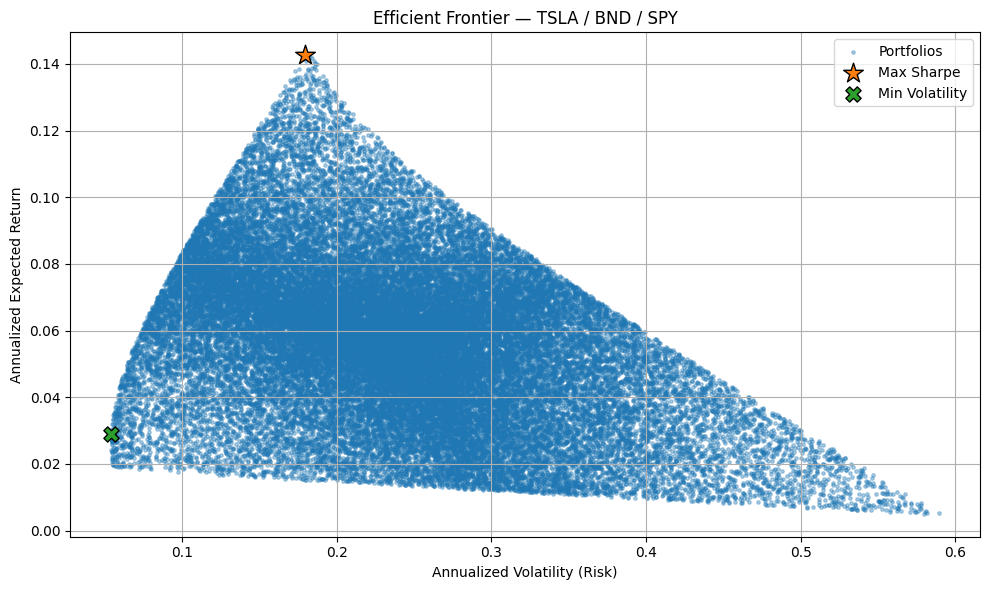

In [13]:

# Plot
png_path = plot_efficient_frontier(frontier, max_sharpe, min_vol)


In [15]:

    # Recommendation (default: max Sharpe)
recommended = recommend_portfolio(max_sharpe, min_vol, preference=preference)
print(recommended)


{'Volatility': 0.1795796678512142, 'Return': 0.14258348041051727, 'Sharpe': 0.6826133597228714, 'TSLA': 0.0011417921298009178, 'BND': 0.01677415323057526, 'SPY': 0.9820840546396238}


In [18]:

    # Write summaries
json_path, txt_path = write_summary(exp_ann, cov_ann, max_sharpe, min_vol, recommended)

print("\n=== Outputs ===")
print("Efficient frontier plot:", png_path)
print("Frontier samples CSV:")
print("Summary (JSON):", json_path)
print("Summary (TXT):", txt_path)
print("\nDone.")




=== Outputs ===
Efficient frontier plot: data/output\efficient_frontier.png
Frontier samples CSV:
Summary (JSON): data/output\portfolio_summary.json
Summary (TXT): data/output\portfolio_summary.txt

Done.
